In [1]:
import pandas as pd
import numpy as np
street_light_data = pd.read_excel('Street light Complaint Details last 6 Month.xlsx')

# Max number of complaints from states

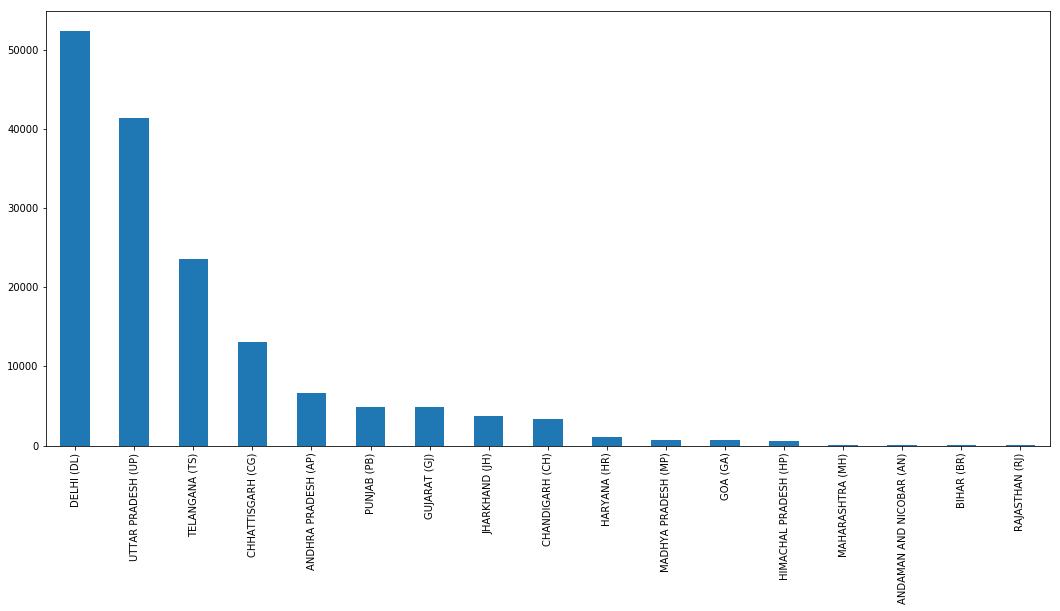

In [30]:

import matplotlib.pyplot as plt
%matplotlib inline
street_light_data['State'].value_counts().plot(kind='bar', figsize=(18,8))

# No of complaints received in all districts of AP

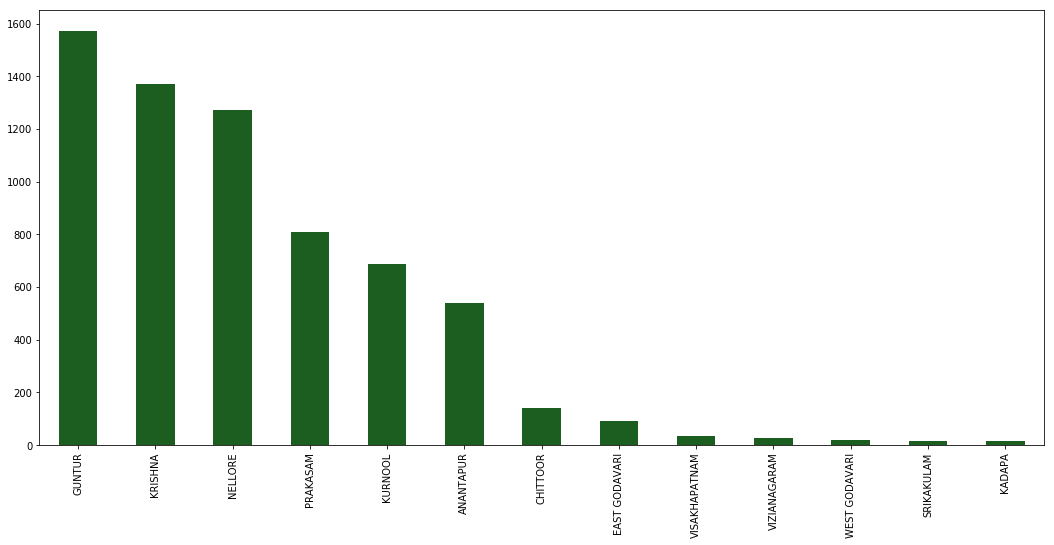

In [35]:
street_light_data[street_light_data.State == 'ANDHRA PRADESH (AP)'].District.value_counts().plot(kind='bar', figsize=(18,8), color='#1B5E20')

# Ticket type and Resolved status

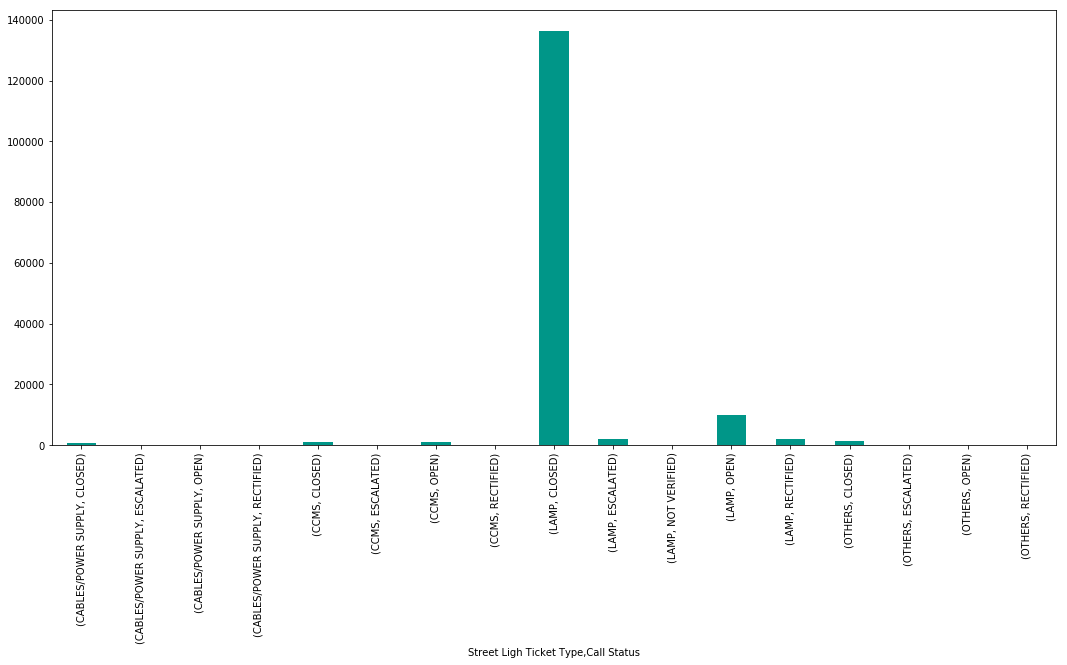

In [33]:
street_light_data.groupby(['Street Ligh Ticket Type','Call Status']).size().plot(kind='bar', figsize=(18,8), color='#009688')

# Escalate delay, level2 reply delay, closer delay aggregate across states

,Esclate_delay,level2_reply_delay,closer_delay
State,,,
ANDHRA PRADESH (AP),304 days,3588 days,63 days
BIHAR (BR),1 days,2 days,0 days
CHANDIGARH (CH),611 days,2318 days,0 days
CHHATTISGARH (CG),1302 days,16719 days,26 days
DELHI (DL),746 days,989 days,3 days
GOA (GA),99 days,171 days,0 days
GUJARAT (GJ),175 days,425 days,0 days
HARYANA (HR),7 days,7 days,0 days
JHARKHAND (JH),180 days,338 days,0 days


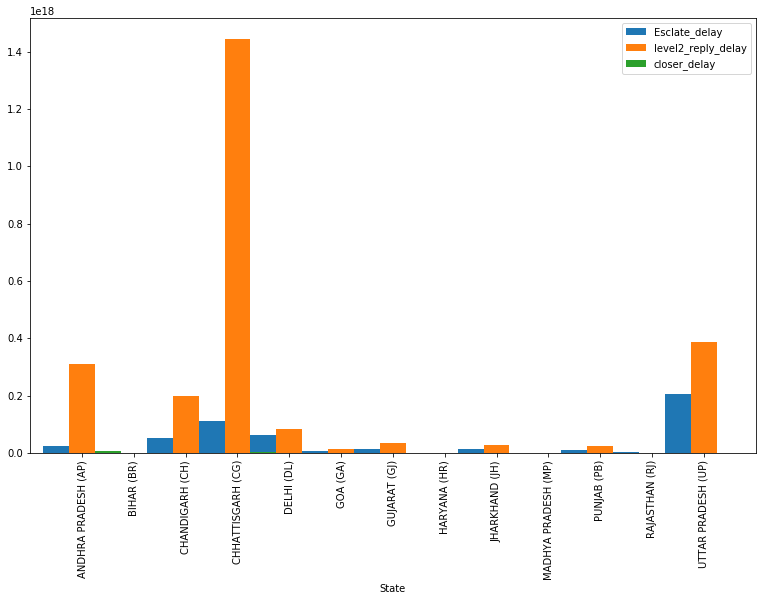

In [21]:

street_light_data_copy = street_light_data.copy(deep=True)

street_light_data_copy['Date of Call'] = pd.to_datetime(street_light_data_copy['Date of Call'])
street_light_data_copy['Date of Escalation'] = pd.to_datetime(street_light_data_copy['Date of Escalation'])
street_light_data_copy['Date of reply by Level 2'] = pd.to_datetime(street_light_data_copy['Date of reply by Level 2'])
street_light_data_copy['Date of Call Closer'] = pd.to_datetime(street_light_data_copy['Date of Call Closer'])
street_light_data_copy.dropna(subset=['Date of Call'], inplace=True)
street_light_data_copy.dropna(subset=['Date of Escalation'], inplace=True)
street_light_data_copy.dropna(subset=['Date of reply by Level 2'], inplace=True)
street_light_data_copy.dropna(subset=['Date of Call Closer'], inplace=True)


street_light_data_copy['Esclate_delay'] = street_light_data_copy['Date of Escalation'] - street_light_data_copy['Date of Call']
street_light_data_copy['level2_reply_delay'] = street_light_data_copy['Date of reply by Level 2'] - street_light_data_copy['Date of Escalation']
street_light_data_copy['closer_delay'] =  street_light_data_copy['Date of Call Closer'] - street_light_data_copy['Date of reply by Level 2']



street_light_data_copy.groupby(['State']).agg({'Esclate_delay': "sum", "level2_reply_delay": "sum", "closer_delay": "sum"}).plot(kind="bar", figsize=(13,8), width=1.5)
street_light_data_copy.groupby(['State']).agg({'Esclate_delay': "sum", "level2_reply_delay": "sum", "closer_delay": "sum"})

# Type of users reporting from various states and counts

In [25]:
street_light_data.groupby(['State', 'Street Ligh Complaint From']).agg({'Street Ligh Complaint From':"count"})

Street Ligh Complaint From
State                    Street Ligh Complaint From                            
ANDAMAN AND NICOBAR (AN) PUBLIC                                              23
                         RESIDENT                                            14
ANDHRA PRADESH (AP)      NIGHT PATROLLING                                  6144
                         PUBLIC                                             390
                         RESIDENT                                            68
BIHAR (BR)               PUBLIC                                              20
                         RESIDENT                                             8
CHANDIGARH (CH)          CCMS TEAM                                            1
                         NIGHT PATROLLING                                     1
                         O&M TEAM                                             1
                         PUBLIC                                            1645
                         RESIDENT                                          1671
                         VIP                                                  1
CHHATTISGARH (CG)        CCMS TEAM                                            2
                         COUNCILOR                                            1
                         NIGHT PATROLLING                                     1
                         OTHERS                                              21
                         PUBLIC                                           12360
                         RESIDENT                                           297
                         RWA                                                  3
                         SDMC                                                 2
                         VIP                                                  6
DELHI (DL)               CCMS TEAM                                           10
                         COUNCILOR                                            8
                         DISCOM                                               2
                         NIGHT PATROLLING                                 35921
                         O&M TEAM                                            26
                         PUBLIC                                           14499
                         RESIDENT                                          1459
                         RWA                                                 49
...                                                                         ...
JHARKHAND (JH)           RESIDENT                                           251
MADHYA PRADESH (MP)      NIGHT PATROLLING                                     1
                         PUBLIC                                             669
                         RESIDENT                                             4
MAHARASHTRA (MH)         PUBLIC                                               3
                         RESIDENT                                            51
PUNJAB (PB)              CCMS TEAM                                            2
                         COUNCILOR                                            4
                         DISCOM                                               1
                         PUBLIC                                            3542
                         RESIDENT                                          1248
                         VIP                                                  1
RAJASTHAN (RJ)           PUBLIC                                               6
                         RESIDENT                                            11
TELANGANA (TS)           COUNCILOR                                            2
                         DISCOM                                               1
                         NIGHT PATROLLING                                 19605
                         O&M TEAM                    

# Various medium of complaint communication w.r.t State

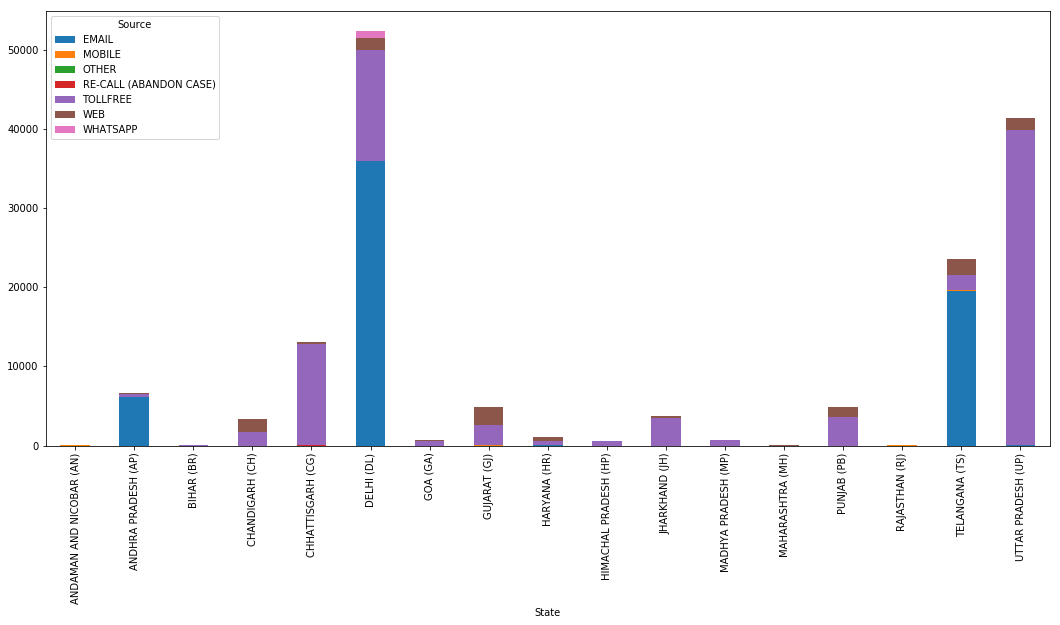

In [10]:
street_light_data.groupby(['State', 'Source'])['State'].count().unstack('Source').fillna(0).plot(kind='bar', stacked=True, figsize=(18,8))

# Overall Vendor performance

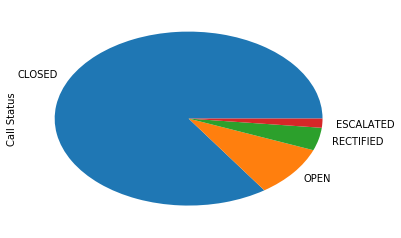

In [22]:
street_light_data[street_light_data['Street Ligh Assigned To'] == 'WIPRO']['Call Status'].value_counts().plot.pie()